In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

### 1. Loading the Dataset

In [2]:
df = pd.read_csv("/content/heart_attack_prediction_indonesia.csv")

In [3]:
# Finding the Shape of the Dataset
df.shape

(158355, 28)

In [4]:
df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [5]:
df.columns

Index(['age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes',
       'cholesterol_level', 'obesity', 'waist_circumference', 'family_history',
       'smoking_status', 'alcohol_consumption', 'physical_activity',
       'dietary_habits', 'air_pollution_exposure', 'stress_level',
       'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic',
       'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
       'triglycerides', 'EKG_results', 'previous_heart_disease',
       'medication_usage', 'participated_in_free_screening', 'heart_attack'],
      dtype='object')

###  2. Droping the unwanted columns

In [6]:
#Drop unwanted columns
df = df.drop(columns=["region","income_level",'participated_in_free_screening'])

In [7]:
# This will convertes all the data to the lowercase
for i in df.select_dtypes(include = 'object').columns:
  df[i] = df[i].str.lower()

In [8]:
# This will removes the white spaces and replaces with Underscore(_)
for i in df.select_dtypes(include='object').columns:
    df[i] = df[i].str.strip().str.replace(' ', '_')


### 3. Filling the Missing Values

In [9]:
#checking for missing values
df.isna().sum()

,0
age,0
gender,0
hypertension,0
diabetes,0
cholesterol_level,0
obesity,0
waist_circumference,0
family_history,0
smoking_status,0
alcohol_consumption,94848


In [10]:
df.isna().sum()/len(df)*100

,0
age,0.000000
gender,0.000000
hypertension,0.000000
diabetes,0.000000
cholesterol_level,0.000000
obesity,0.000000
waist_circumference,0.000000
family_history,0.000000
smoking_status,0.000000
alcohol_consumption,59.895804


- "alcohol_consumption" column is having missing values percent more than 50 percent so better to remove the column

In [11]:
df = df.drop(columns=["alcohol_consumption"])

### 4. Droping Duplicated Values

In [12]:
# Checking wheather the dataset is having duplicated values
df.duplicated().sum()

np.int64(0)

In [13]:
df.shape

(158355, 24)

### 5. Outliers in the data

<Axes: >

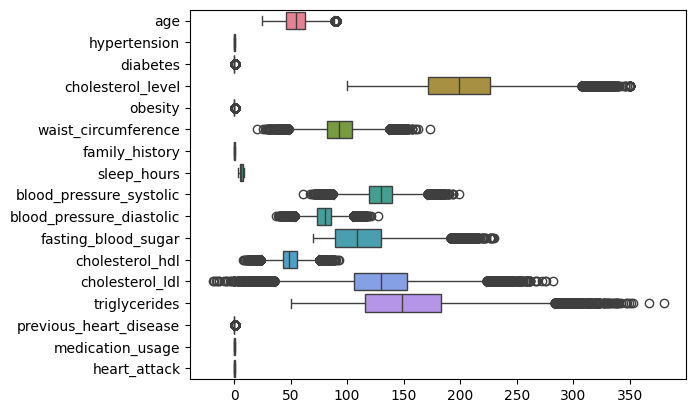

In [14]:
# checking for outliers
sns.boxplot(df,orient="h")

In [15]:
# Handle outliers only for numeric columns
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"\nColumn: {column}")
    print(f"Number of outliers: {outliers.shape[0]}")
    if outliers.shape[0] > 0:
        print(outliers[[column]])

    # Clip values
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


Column: age
Number of outliers: 340
        age
209      90
478      90
1615     90
1957     90
2305     90
...     ...
156683   90
156851   90
157322   90
158048   90
158049   90

[340 rows x 1 columns]

Column: hypertension
Number of outliers: 0

Column: diabetes
Number of outliers: 31640
        diabetes
0              1
7              1
16             1
17             1
21             1
...          ...
158302         1
158306         1
158323         1
158334         1
158341         1

[31640 rows x 1 columns]

Column: cholesterol_level
Number of outliers: 518
        cholesterol_level
322                   310
881                   318
1281                  325
1350                  319
1495                  319
...                   ...
156684                308
156717                334
156827                322
156978                350
157214                318

[518 rows x 1 columns]

Column: obesity
Number of outliers: 39573
        obesity
2             1
5             1

<Axes: >

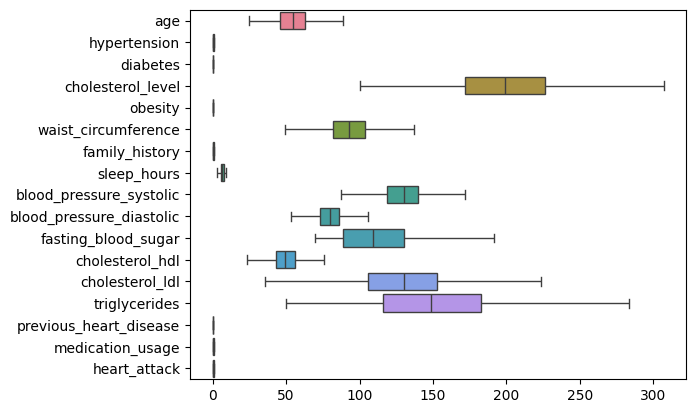

In [ ]:
#verfying whether all the outliers are handled or not
sns.boxplot(df,orient="h")

### 6. Features selection

In [16]:
num_col = df.select_dtypes(include = ['int64','float64'])
num_col.head()

,age,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,heart_attack
0,60.0,0,0,211,0,83,0,5.970603,113.0,62.0,173.0,48.0,121.0,101.0,0,0,0
1,53.0,0,0,208,0,106,1,5.643813,132.0,76.0,70.0,58.0,83.0,138.0,0,0,0
2,62.0,0,0,231,0,112,1,6.336197,116.0,74.0,118.0,69.0,130.0,171.0,0,1,1
3,73.0,1,0,202,0,82,1,7.912990,136.0,65.0,98.0,52.0,85.0,146.0,0,1,0
4,52.0,1,0,232,0,89,0,3.252338,127.0,75.0,104.0,59.0,127.0,139.0,0,0,1


In [17]:
corr_data = num_col.corr()['heart_attack'].sort_values(ascending=False)

In [18]:
print(corr_data)

heart_attack                1.000000
hypertension                0.269261
age                         0.105782
cholesterol_level           0.092556
fasting_blood_sugar         0.069660
waist_circumference         0.067749
medication_usage            0.004694
family_history              0.001374
sleep_hours                 0.000673
cholesterol_ldl             0.000616
cholesterol_hdl             0.000431
blood_pressure_diastolic   -0.000331
triglycerides              -0.000636
blood_pressure_systolic    -0.001683
diabetes                         NaN
obesity                          NaN
previous_heart_disease           NaN
Name: heart_attack, dtype: float64


In [19]:
corr_data = pd.DataFrame(corr_data).reset_index()

In [20]:
corr_data

,index,heart_attack
0,heart_attack,1.000000
1,hypertension,0.269261
2,age,0.105782
3,cholesterol_level,0.092556
4,fasting_blood_sugar,0.069660
5,waist_circumference,0.067749
6,medication_usage,0.004694
7,family_history,0.001374
8,sleep_hours,0.000673
9,cholesterol_ldl,0.000616


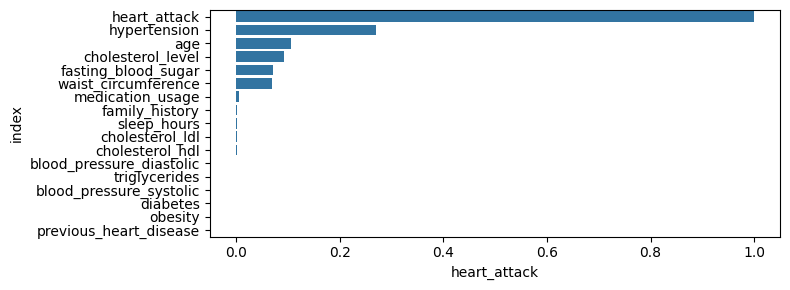

In [21]:
# Advanced feature selection
plt.figure(figsize=(8,3))
sns.barplot(data = corr_data,y='index',x='heart_attack')
plt.tight_layout()
plt.show()

- By looking into above feature selection barplot we can say that these features are having weak correlation so we can delete these features:


      - family_history	0.001374
      - sleep_hours	0.000673
      - cholesterol_ldl	0.000616
      - cholesterol_hdl	0.000431
      - blood_pressure_diastolic	-0.000331
      - triglycerides	-0.000636
      - blood_pressure_systolic	-0.001683
      - diabetes	NaN
      - obesity	NaN
      - previous_heart_disease	NaN


In [22]:
# Dropping the above features
df = df.drop(columns=["family_history","sleep_hours","cholesterol_ldl","cholesterol_hdl","blood_pressure_diastolic","triglycerides","blood_pressure_systolic","diabetes","obesity","previous_heart_disease"])

In [23]:
cat_col = df.select_dtypes(include = ['object'])
cat_col.head()

,gender,smoking_status,physical_activity,dietary_habits,air_pollution_exposure,stress_level,EKG_results
0,male,never,high,unhealthy,moderate,moderate,normal
1,female,past,moderate,healthy,high,high,normal
2,female,past,moderate,healthy,low,low,abnormal
3,male,never,moderate,unhealthy,low,high,normal
4,male,current,moderate,unhealthy,high,moderate,normal


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     158355 non-null  float64
 1   gender                  158355 non-null  object 
 2   hypertension            158355 non-null  int64  
 3   cholesterol_level       158355 non-null  int64  
 4   waist_circumference     158355 non-null  int64  
 5   smoking_status          158355 non-null  object 
 6   physical_activity       158355 non-null  object 
 7   dietary_habits          158355 non-null  object 
 8   air_pollution_exposure  158355 non-null  object 
 9   stress_level            158355 non-null  object 
 10  fasting_blood_sugar     158355 non-null  float64
 11  EKG_results             158355 non-null  object 
 12  medication_usage        158355 non-null  int64  
 13  heart_attack            158355 non-null  int64  
dtypes: float64(2), int64

### 7. Model Building

In [25]:
# Target variable assignment
y = df['heart_attack']

In [26]:
# select predictors
X = df.drop(columns=['heart_attack'])

In [27]:
# Split the data into test and train data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (126684, 13)
X_test: (31671, 13)
y_train: (126684,)
y_test: (31671,)


In [28]:
cat_col = df.select_dtypes(include = 'object').columns
cat_col

Index(['gender', 'smoking_status', 'physical_activity', 'dietary_habits',
       'air_pollution_exposure', 'stress_level', 'EKG_results'],
      dtype='object')

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126684 entries, 72396 to 121958
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     126684 non-null  float64
 1   gender                  126684 non-null  object 
 2   hypertension            126684 non-null  int64  
 3   cholesterol_level       126684 non-null  int64  
 4   waist_circumference     126684 non-null  int64  
 5   smoking_status          126684 non-null  object 
 6   physical_activity       126684 non-null  object 
 7   dietary_habits          126684 non-null  object 
 8   air_pollution_exposure  126684 non-null  object 
 9   stress_level            126684 non-null  object 
 10  fasting_blood_sugar     126684 non-null  float64
 11  EKG_results             126684 non-null  object 
 12  medication_usage        126684 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 13.5+ MB


In [30]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Get numerical and categorical column names from X_train
# This ensures the column lists are up-to-date with the current X_train DataFrame
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()

transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop=None), categorical_features),
    ],
    remainder='passthrough'
)

### CatBoost

In [32]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.1 MB/s eta 0:00:00


In [33]:
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier
cat  = make_pipeline(transformer, CatBoostClassifier())


Learning rate set to 0.081432
0:	learn: 0.6765844	total: 72.3ms	remaining: 1m 12s
1:	learn: 0.6631893	total: 113ms	remaining: 56.5s
2:	learn: 0.6512254	total: 164ms	remaining: 54.5s
3:	learn: 0.6413269	total: 199ms	remaining: 49.7s
4:	learn: 0.6334073	total: 238ms	remaining: 47.3s
5:	learn: 0.6264936	total: 298ms	remaining: 49.4s
6:	learn: 0.6209226	total: 349ms	remaining: 49.4s
7:	learn: 0.6162906	total: 408ms	remaining: 50.6s
8:	learn: 0.6123100	total: 471ms	remaining: 51.8s
9:	learn: 0.6090947	total: 532ms	remaining: 52.7s
10:	learn: 0.6061579	total: 615ms	remaining: 55.3s
11:	learn: 0.6040196	total: 715ms	remaining: 58.9s
12:	learn: 0.6019398	total: 768ms	remaining: 58.3s
13:	learn: 0.6003233	total: 958ms	remaining: 1m 7s
14:	learn: 0.5989276	total: 1.09s	remaining: 1m 11s
15:	learn: 0.5979195	total: 1.21s	remaining: 1m 14s
16:	learn: 0.5967418	total: 1.34s	remaining: 1m 17s
17:	learn: 0.5958252	total: 1.41s	remaining: 1m 16s
18:	learn: 0.5949880	total: 1.45s	remaining: 1m 14s
19:	

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'hypertension',
                                                   'cholesterol_level',
                                                   'waist_circumference',
                                                   'fasting_blood_sugar',
                                                   'medication_usage']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'smoking_status',
                                                   'physical_activity',
                                                   'dietary_habits',
                                                   'air_pollution_exposure',
                                                   'stress_level',
                                                   'EKG_results'])])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x7a50fa06b140>)])

In [35]:
cat_pred = cat.predict(X_test)

In [44]:
# Metrics
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, cat_pred)
report = classification_report(y_test, cat_pred)
print(f"Accuracy Score of Catboost: {accuracy:.4f}\n")
print("Classification Report:")
print(report)

Accuracy Score of Catboost: 0.6840

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.82      0.76     18906
           1       0.64      0.49      0.55     12765

    accuracy                           0.68     31671
   macro avg       0.67      0.65      0.65     31671
weighted avg       0.68      0.68      0.67     31671



### Light Gradient Boosting Machine Classifier

In [40]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
# Implementing the pipeline
lgbm = make_pipeline(transformer, LGBMClassifier())

In [41]:
# Fitting lgbm
lgbm.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 50736, number of negative: 75948
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 531
[LightGBM] [Info] Number of data points in the train set: 126684, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.400493 -> initscore=-0.403413
[LightGBM] [Info] Start training from score -0.403413


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'hypertension',
                                                   'cholesterol_level',
                                                   'waist_circumference',
                                                   'fasting_blood_sugar',
                                                   'medication_usage']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'smoking_status',
                                                   'physical_activity',
                                                   'dietary_habits',
                                                   'air_pollution_exposure',
                                                   'stress_level',
                                                   'EKG_results'])])),
                ('lgbmclassifier', LGBMClassifier())])

In [42]:
# Predict from lgbm
lgbm_pred = lgbm.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [43]:
# Metrics
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, cat_pred)
report = classification_report(y_test, lgbm_pred)
print(f"Accuracy Score of lgbm : {accuracy:.4f}\n")
print("Classification Report:")
print(report)

Accuracy Score of lgbm : 0.6840

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.76     18906
           1       0.64      0.49      0.56     12765

    accuracy                           0.69     31671
   macro avg       0.67      0.65      0.66     31671
weighted avg       0.68      0.69      0.68     31671



### KNN Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn  = make_pipeline(transformer, KNeighborsClassifier())

In [46]:
# fitting the k-n-n
knn.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'hypertension',
                                                   'cholesterol_level',
                                                   'waist_circumference',
                                                   'fasting_blood_sugar',
                                                   'medication_usage']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'smoking_status',
                                                   'physical_activity',
                                                   'dietary_habits',
                                                   'air_pollution_exposure',
                                                   'stress_level',
                                                   'EKG_results'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [47]:
knn_pred = knn.predict(X_test)

In [49]:
# Metrics
accuracy = accuracy_score(y_test, knn_pred)
report = classification_report(y_test, knn_pred)

print(f"Accuracy Score of KNN: {accuracy:.4f}\n")
print("Classification Report:")
print(report)

Accuracy Score of KNN: 0.6310

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71     18906
           1       0.55      0.46      0.50     12765

    accuracy                           0.63     31671
   macro avg       0.61      0.60      0.60     31671
weighted avg       0.62      0.63      0.62     31671



### Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
rmf  = make_pipeline(transformer, RandomForestClassifier())

In [53]:
# Fitting random forest
rmf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'hypertension',
                                                   'cholesterol_level',
                                                   'waist_circumference',
                                                   'fasting_blood_sugar',
                                                   'medication_usage']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'smoking_status',
                                                   'physical_activity',
                                                   'dietary_habits',
                                                   'air_pollution_exposure',
                                                   'stress_level',
                                                   'EKG_results'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [54]:
rmf_pred = rmf.predict(X_test)

In [55]:
# Metrics
accuracy = accuracy_score(y_test, rmf_pred)
report = classification_report(y_test, rmf_pred)
print(f"Accuracy Score: {accuracy:.4f}\n")
print("Classification Report:")
print(report)

Accuracy Score: 0.6663

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74     18906
           1       0.61      0.49      0.54     12765

    accuracy                           0.67     31671
   macro avg       0.65      0.64      0.64     31671
weighted avg       0.66      0.67      0.66     31671



### XG-Boost Classifier

In [61]:
from xgboost import XGBClassifier
xgb  = make_pipeline(transformer, XGBClassifier())

In [68]:
# fitting xgbm
xgb.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'hypertension',
                                                   'cholesterol_level',
                                                   'waist_circumference',
                                                   'fasting_blood_sugar',
                                                   'medication_usage']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'smoking_status',
                                                   'physical_activity',
                                                   'dietary_habi...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [65]:
xgb_pred = xgb.predict(X_test)

In [66]:
# Metrics
accuracy = accuracy_score(y_test, xgb_pred)
report = classification_report(y_test, xgb_pred)
print(f"Accuracy Score XG-Boost: {accuracy:.4f}\n")
print("Classification Report:")
print(report)

Accuracy Score XG-Boost: 0.6794

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75     18906
           1       0.63      0.49      0.55     12765

    accuracy                           0.68     31671
   macro avg       0.67      0.65      0.65     31671
weighted avg       0.67      0.68      0.67     31671



### Descision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
dt = make_pipeline(transformer, DecisionTreeClassifier())

In [70]:
## fitting decission ttree
dt.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'hypertension',
                                                   'cholesterol_level',
                                                   'waist_circumference',
                                                   'fasting_blood_sugar',
                                                   'medication_usage']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'smoking_status',
                                                   'physical_activity',
                                                   'dietary_habits',
                                                   'air_pollution_exposure',
                                                   'stress_level',
                                                   'EKG_results'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [71]:
dt_pred = dt.predict(X_test)

In [73]:
# Metrics
accuracy = accuracy_score(y_test, dt_pred)
report = classification_report(y_test, dt_pred)
print(f"Accuracy Score Descision Tree: {accuracy:.4f}\n")
print("Classification Report:")
print(report)

Accuracy Score Descision Tree: 0.5841

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65     18906
           1       0.48      0.49      0.49     12765

    accuracy                           0.58     31671
   macro avg       0.57      0.57      0.57     31671
weighted avg       0.59      0.58      0.58     31671



### Evaluation Function

In [75]:
def evaluate(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    print(f"Accuracy Score of {model_name}: {accuracy:.4f}\n")
    print("Classification Report:")
    print(report)
    print("\n" + "="*50 + "\n")

evaluate("LGBM", y_test, lgbm_pred)
evaluate("RandomForest", y_test, rmf_pred)
evaluate("DecisionTree", y_test, dt_pred)
evaluate("CatBoost", y_test, cat_pred)
evaluate("KNN", y_test, knn_pred)
evaluate("XGBoost", y_test, xgb_pred)

Accuracy Score of LGBM: 0.6851

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.76     18906
           1       0.64      0.49      0.56     12765

    accuracy                           0.69     31671
   macro avg       0.67      0.65      0.66     31671
weighted avg       0.68      0.69      0.68     31671



Accuracy Score of RandomForest: 0.6663

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74     18906
           1       0.61      0.49      0.54     12765

    accuracy                           0.67     31671
   macro avg       0.65      0.64      0.64     31671
weighted avg       0.66      0.67      0.66     31671



Accuracy Score of DecisionTree: 0.5841

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65     18906
           1       0.48      0.49      0.49     1276

- By looking to all the models accuracy's we came to a conclusion that "LGBM" method is best for the heart stroke prediction so we use that model

In [79]:
import pickle
with open ('lgbm_model.pkl','wb') as f:
  pickle.dump(lgbm,f)

In [90]:
import pandas as pd
import pickle

# Load your trained model
with open("lgbm_model.pkl", "rb") as f:
    model = pickle.load(f)

# Columns EXACTLY as in your dataset
columns = [
    'age', 'gender', 'hypertension', 'cholesterol_level', 'waist_circumference',
    'smoking_status', 'physical_activity', 'dietary_habits',
    'air_pollution_exposure', 'stress_level', 'fasting_blood_sugar',
    'EKG_results', 'medication_usage'
]

# Sample input based on your dataset examples
sample_input = pd.DataFrame([[
    60,          # age
    "male",      # gender
    1,           # hypertension
    211,         # cholesterol_level
    83,          # waist_circumference
    "current",     # smoking_status
    "high",      # physical_activity
    "unhealthy", # dietary_habits
    "moderate",  # air_pollution_exposure
    "moderate",  # stress_level
    173.0,       # fasting_blood_sugar
    "normal",    # EKG_results
    0            # medication_usage
]], columns=columns)

# Predict
prediction = model.predict(sample_input)[0]

# Convert output into meaningful message
if prediction == 0:
    result = "He is healthy."
else:
    result = "He may get a heart stroke, consult a doctor ASAP."

print("Prediction:", result)

Prediction: He may get a heart stroke, consult a doctor ASAP.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
